In [1]:
import NeuroKit_Eda_Analaysis as eda
import pandas as pd

In [2]:
file_name = 'D:\\Download\\GSR-20240530T062759Z-001\\GSR\\103_GSR\\baseline.csv'

In [3]:
df = eda.load_data(file_name)

# Preprocess the data
df = eda.preprocess_data(df)


In [4]:
# Calculate the sample rate
sample_rate = eda.calculate_sample_rate(df)

In [5]:
Skin_conductance = df['Skin_conductance']

In [6]:
# Smooth and filter the signal
smoothed_signal = eda.smooth_signal(Skin_conductance, sample_rate)
filtered_signal = eda.filter_signal(smoothed_signal, sample_rate)

In [7]:
signals, info = eda.process_eda_signal(filtered_signal, sample_rate)


In [8]:
tonic_component, phasic_component = eda.extract_components(signals)

In [9]:
peaks = eda.find_peaks(phasic_component)

In [10]:
# Calculate amplitude and duration metrics
eda_processed = pd.DataFrame(signals)  # Make sure you have a DataFrame of processed signals
eda_processed = eda.fill_missing_values(eda_processed)  # Fill missing values
metrics = eda.calculate_metrics(eda_processed, smoothed_signal, sample_rate)

In [11]:
print(metrics)


{'Amplitude Max': 0.04476674793319932, 'Amplitude Min': 0.0, 'Duration Max': 0.010683139309254271, 'Duration Min': 0.0, 'Duration Mean': 6.494744247189256e-07, 'Raw Max': 1.839522874635596, 'Raw Std': 0.05943470784328607, 'Rise Time Max': 0.001017293997965412, 'Recovery Time Max': 0.003146056718021213, 'Peak Count': 128731}


In [12]:
output_file_name = file_name + '_eda_metrics.csv'
eda.save_metrics_to_csv(metrics, output_file_name)

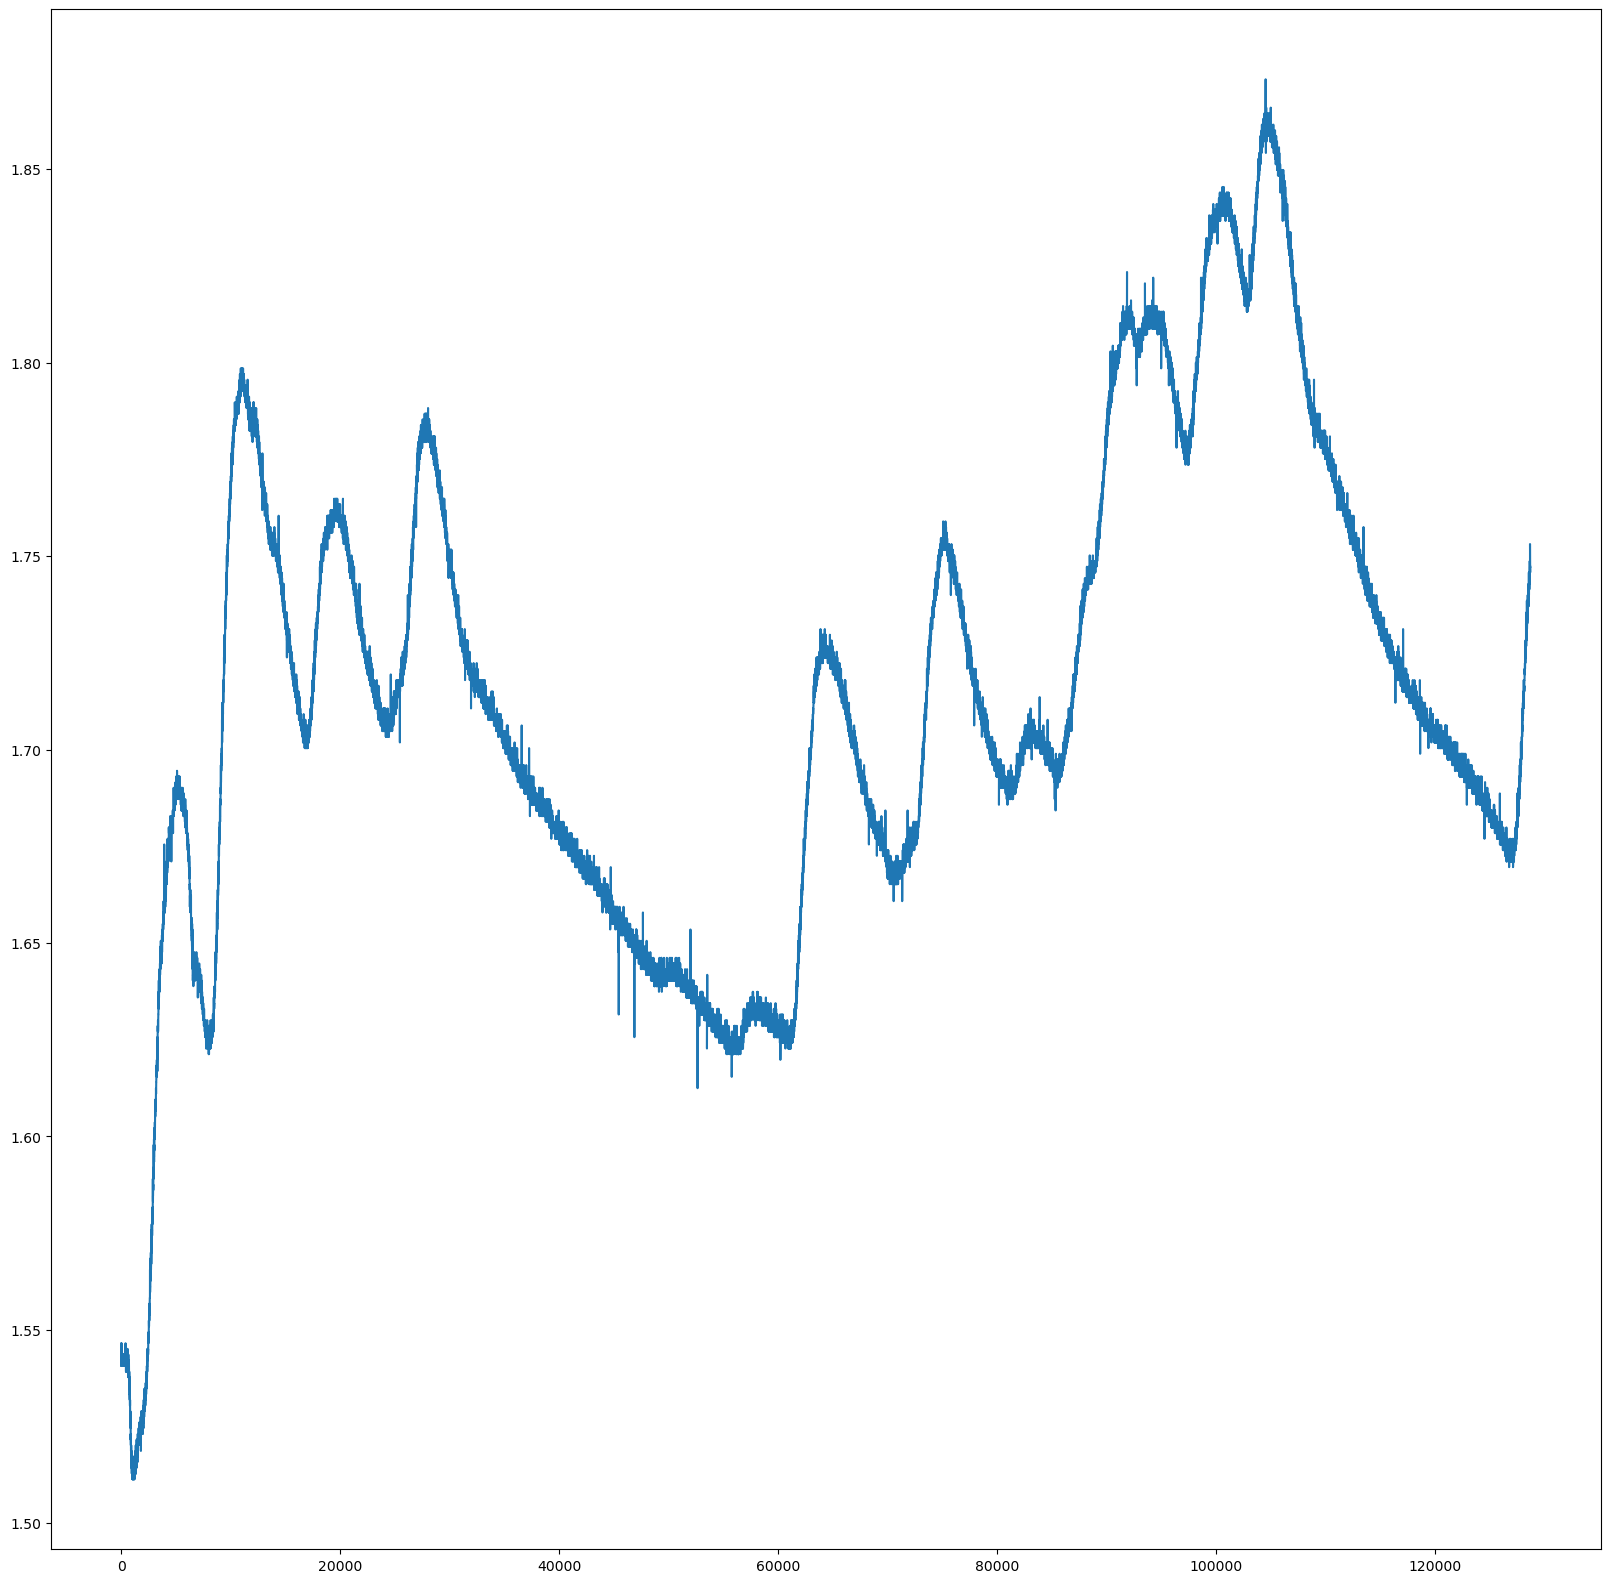

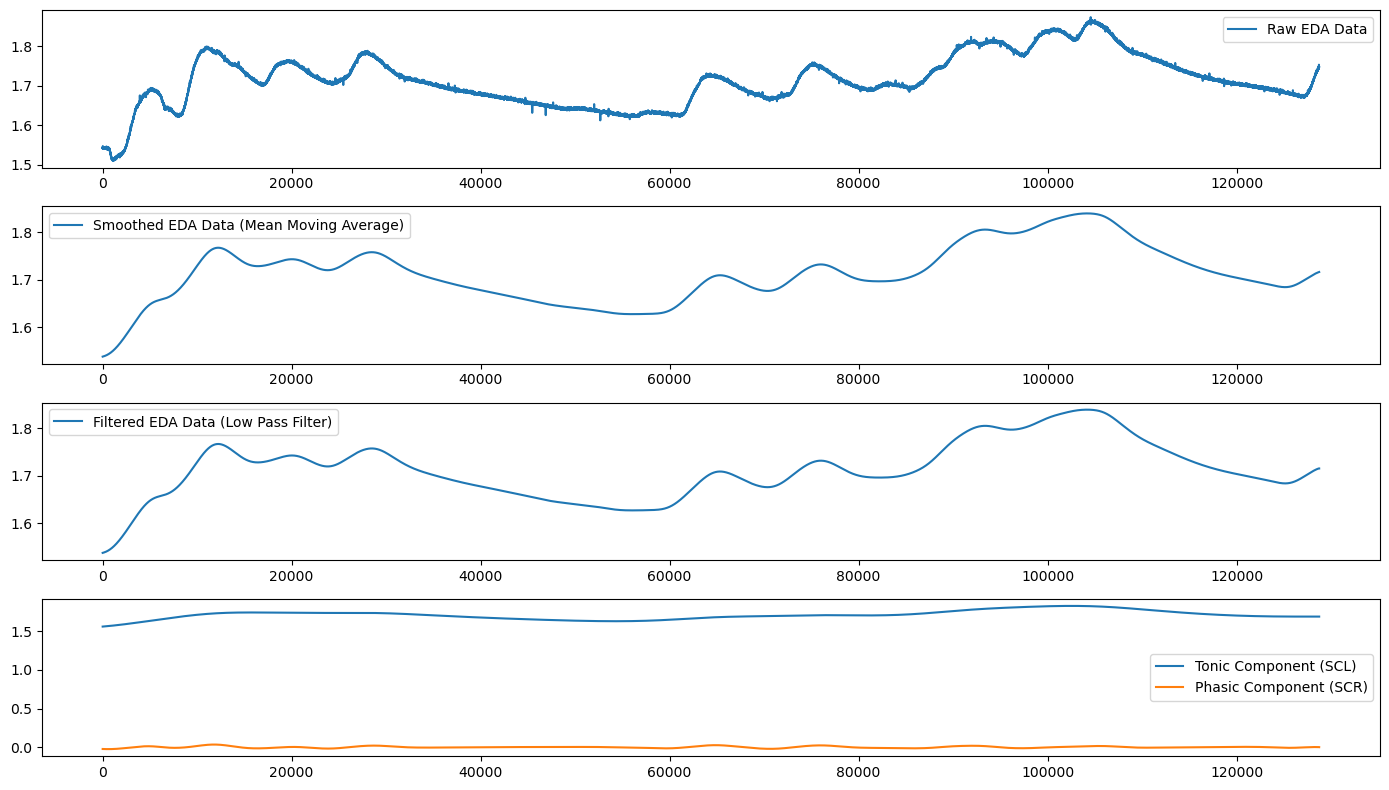

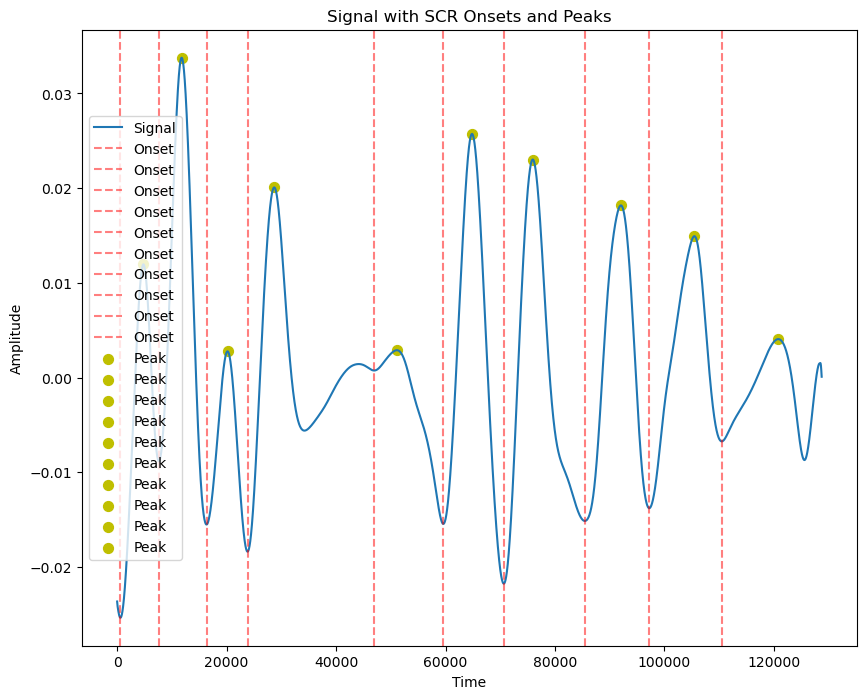

In [13]:
# Plot the results
eda.plot_signal(df, Skin_conductance)
eda.plot_components(Skin_conductance, smoothed_signal, filtered_signal, tonic_component, phasic_component)
eda.plot_peaks(phasic_component, peaks)

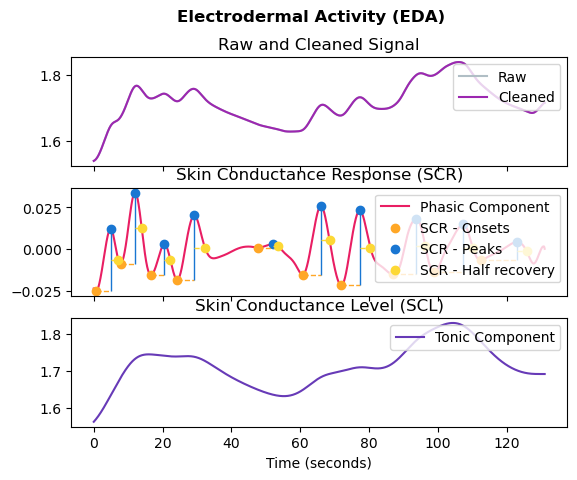

In [14]:
eda.plot_filered_neurokit_scr_signal(filtered_signal, sample_rate)

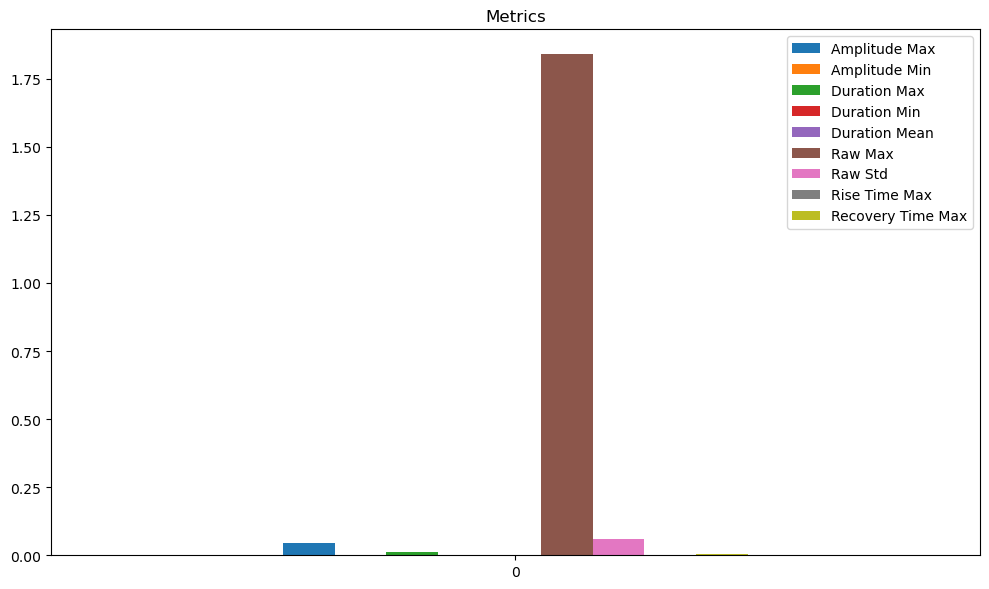

In [15]:
eda.plot_metrics_from_csv(output_file_name)